<a href="https://colab.research.google.com/github/FelipeNascimentoDev/reducao-de-dimensionalidade-colab-python/blob/main/DIO_binarizacao_E_gray_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Passo 1 — Import das libs, carregar e visualizar a imagem

Nota: não será usada nenhuma biblioteca com funções prontas de conversão para imagens.

Saving Lenna_PNG.png to Lenna_PNG (1).png


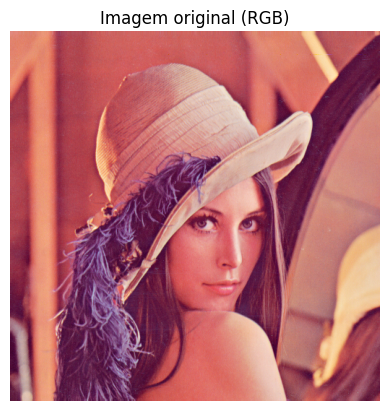

Formato da imagem: (512, 512, 3)


In [10]:
# Imports básicos (permitidos)
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1) Upload da imagem (escolha um arquivo .jpg/.png local)
uploaded = files.upload()  # vai abrir o seletor de arquivos

# 2) Abrir a imagem enviada e garantir formato RGB (3 canais)
fname = list(uploaded.keys())[0]
img = Image.open(fname).convert('RGB')  # só carregar, sem converter pra cinza!

# 3) Converter para array NumPy (para trabalharmos pixel a pixel)
img_np = np.array(img)  # shape: (H, W, 3)

# 4) Visualizar a imagem original
plt.imshow(img_np)
plt.title('Imagem original (RGB)')
plt.axis('off')
plt.show()

print('Formato da imagem:', img_np.shape)  # deve ser (altura, largura, 3)

# Passo 2 — Implementação do zero da conversão para escala de cinza (0–255)

A ideia é percorrer pixel a pixel e aplicar a fórmula clássica de luminosidade:
Gray = 0.299 ⋅ R + 0.587 ⋅ G + 0.114 ⋅ B

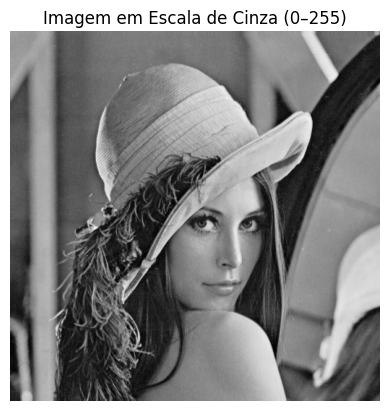

In [11]:
def rgb_to_grayscale(img_rgb):
    """
    Converte manualmente uma imagem RGB (H, W, 3) para escala de cinza (H, W).
    Não usa funções prontas de bibliotecas.
    """
    # Cria uma matriz vazia (apenas 2D, sem canais)
    h, w, _ = img_rgb.shape
    gray_img = np.zeros((h, w), dtype=np.uint8)

    # Percorre pixel a pixel
    for i in range(h):
        for j in range(w):
            r, g, b = img_rgb[i, j]
            # Fórmula da luminosidade
            gray = int(0.299*r + 0.587*g + 0.114*b)
            gray_img[i, j] = gray

    return gray_img

# Aplicar a função
gray_img = rgb_to_grayscale(img_np)

# Mostrar resultado
plt.imshow(gray_img, cmap='gray')
plt.title('Imagem em Escala de Cinza (0–255)')
plt.axis('off')
plt.show()

# Passo 3 — Binarização (Preto e Branco: 0 e 255)

 → Agora é aplicado um limiar (threshold):

- Se o valor do pixel for maior ou igual ao limiar → vira 255 (branco)

- Caso contrário → vira 0 (preto)

- O limiar (threshold) é o valor "128".

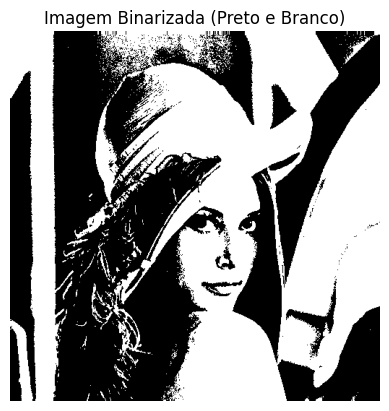

In [12]:
def binarize_image(gray_img, threshold=128):
    """
    Converte manualmente uma imagem em tons de cinza (0-255)
    para binária (0 ou 255) usando um threshold.
    """
    h, w = gray_img.shape
    binary_img = np.zeros((h, w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            if gray_img[i, j] >= threshold:
                binary_img[i, j] = 255
            else:
                binary_img[i, j] = 0

    return binary_img

# Aplicar a função
binary_img = binarize_image(gray_img, threshold=128)

# Mostrar resultado
plt.imshow(binary_img, cmap='gray')
plt.title('Imagem Binarizada (Preto e Branco)')
plt.axis('off')
plt.show()

# Passo 4 — Comparar Original x Tons de Cinza x Binária

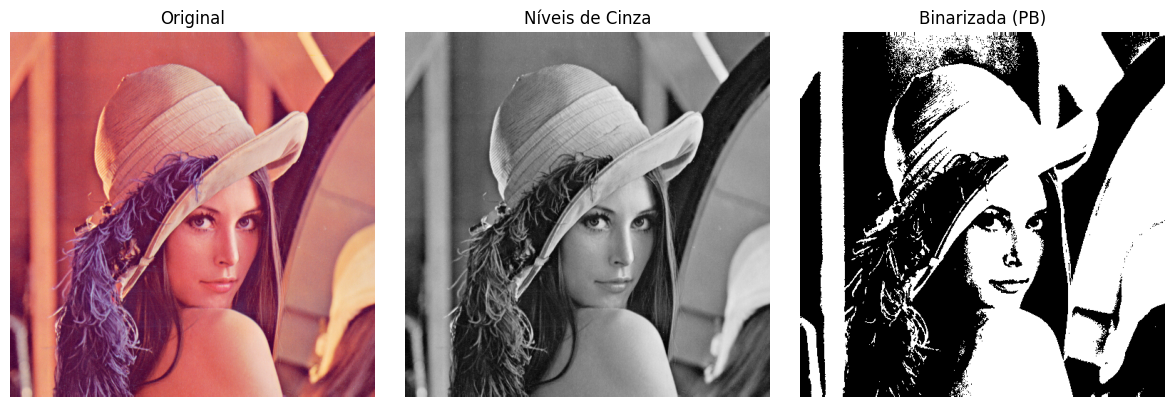

In [13]:
plt.figure(figsize=(12,4))

# Original
plt.subplot(1,3,1)
plt.imshow(img_np)  # já está em RGB
plt.title('Original')
plt.axis('off')

# Grayscale
plt.subplot(1,3,2)
plt.imshow(gray_img, cmap='gray')
plt.title('Níveis de Cinza')
plt.axis('off')

# Binária
plt.subplot(1,3,3)
plt.imshow(binary_img, cmap='gray')
plt.title('Binarizada (PB)')
plt.axis('off')

plt.tight_layout()
plt.show()